In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Post-MD-stability analysis of protein-ligand complex
1. The docked poses of selected compounds are in (MD_results/select_pose/).
2. The corresponding protein structure are in (structure_data/prepare_protein/).
3. The scripts used for MD simulations can be found at (MD_results/MD_amber), it can be automatically.
4. For each docking site (active_ATP, active_pep, inactive_ATP, inactive_Hel), only one example of MD simulations was carried out, (each protein-ligand complex with 3 independent 20-ns runs).
5. Currently, I cannot use too much computer time for this exercise.

For example, for inactive_ATP site, post-MD-stability analysis for one protein-ligand complex was carried out.

In [2]:
site = 'inactive_ATP'

#### RMSD analysis

In [3]:
RMSD1_pro = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat01_rmsd_pro.out'%site)
RMSD2_pro = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat02_rmsd_pro.out'%site)
RMSD3_pro = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat03_rmsd_pro.out'%site)
RMSD1_lig = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat01_rmsd_lig.out'%site)
RMSD2_lig = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat02_rmsd_lig.out'%site)
RMSD3_lig = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat03_rmsd_lig.out'%site)

In [4]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

Text(0.5, 1.0, 'Ligand')

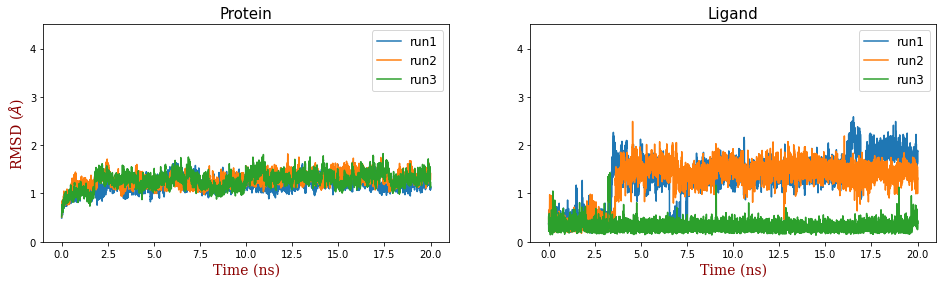

In [5]:
plt.figure(figsize=[16,4])
plt.subplot(121)
plt.plot(RMSD1_pro[:,0]*0.002,RMSD1_pro[:,1], label='run1')
plt.plot(RMSD2_pro[:,0]*0.002,RMSD2_pro[:,1], label='run2')
plt.plot(RMSD3_pro[:,0]*0.002,RMSD3_pro[:,1], label='run3')
plt.ylim(0,4.5)
plt.yticks([0,1,2,3,4])
plt.xlabel('Time (ns)', fontdict=font)
plt.ylabel(r'RMSD ($\AA$)',fontdict=font)
plt.legend(fontsize=12)
plt.title('Protein', fontsize=15)


plt.subplot(122)
plt.plot(RMSD1_lig[:,0]*0.002,RMSD1_lig[:,1], label='run1')
plt.plot(RMSD2_lig[:,0]*0.002,RMSD2_lig[:,1], label='run2')
plt.plot(RMSD3_lig[:,0]*0.002,RMSD3_lig[:,1], label='run3')
plt.ylim(0,4.5)
plt.yticks([0,1,2,3,4])
plt.xlabel('Time (ns)', fontdict=font)
plt.legend(fontsize=12)
plt.title('Ligand', fontsize=15)

The above RMSD evolution over 20-ns show that both the protein and the ligand are relative stable in complex.

#### RMSF analysis (here I use b-factor as metric)

In [6]:
RMSF1 = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat01_res_flucts.out'%site)
RMSF2 = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat02_res_flucts.out'%site)
RMSF3 = np.loadtxt('MD_results/Post_MD_analysis/%s/repeat03_res_flucts.out'%site)

Text(0.5, 1.0, 'Protein-Ligand Complex')

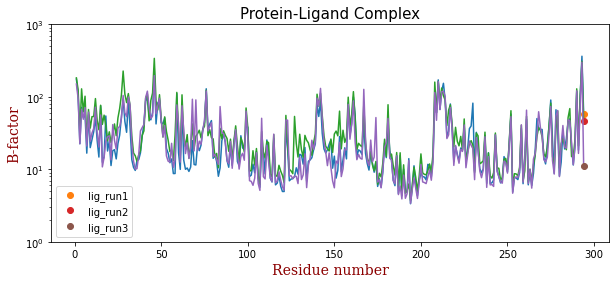

In [7]:
plt.figure(figsize=[10,4])
plt.plot(RMSF1[:,0],RMSF1[:,1])
plt.plot(RMSF1[-1,0],RMSF1[-1,1],'o', label='lig_run1')
plt.plot(RMSF2[:,0],RMSF2[:,1])
plt.plot(RMSF2[-1,0],RMSF2[-1,1],'o', label='lig_run2')
plt.plot(RMSF3[:,0],RMSF3[:,1])
plt.plot(RMSF3[-1,0],RMSF3[-1,1],'o', label='lig_run3')
plt.yscale('log')
plt.ylim(1,1000)
plt.xlabel('Residue number', fontdict=font)
plt.ylabel('B-factor', fontdict=font)
plt.legend()
plt.title('Protein-Ligand Complex', fontsize=15)

Some of the protein region is relatively flexible in MD simulations, but b-factor of ligand is relatively stable in the docked position (b-factor: 57.8, 46.0 and 11.0 for 3 independent runs)

In [9]:
RMSF1[-1,1],RMSF2[-1,1],RMSF3[-1,1]

(57.7836, 46.0325, 10.9826)